First 5 records of the dataset:


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


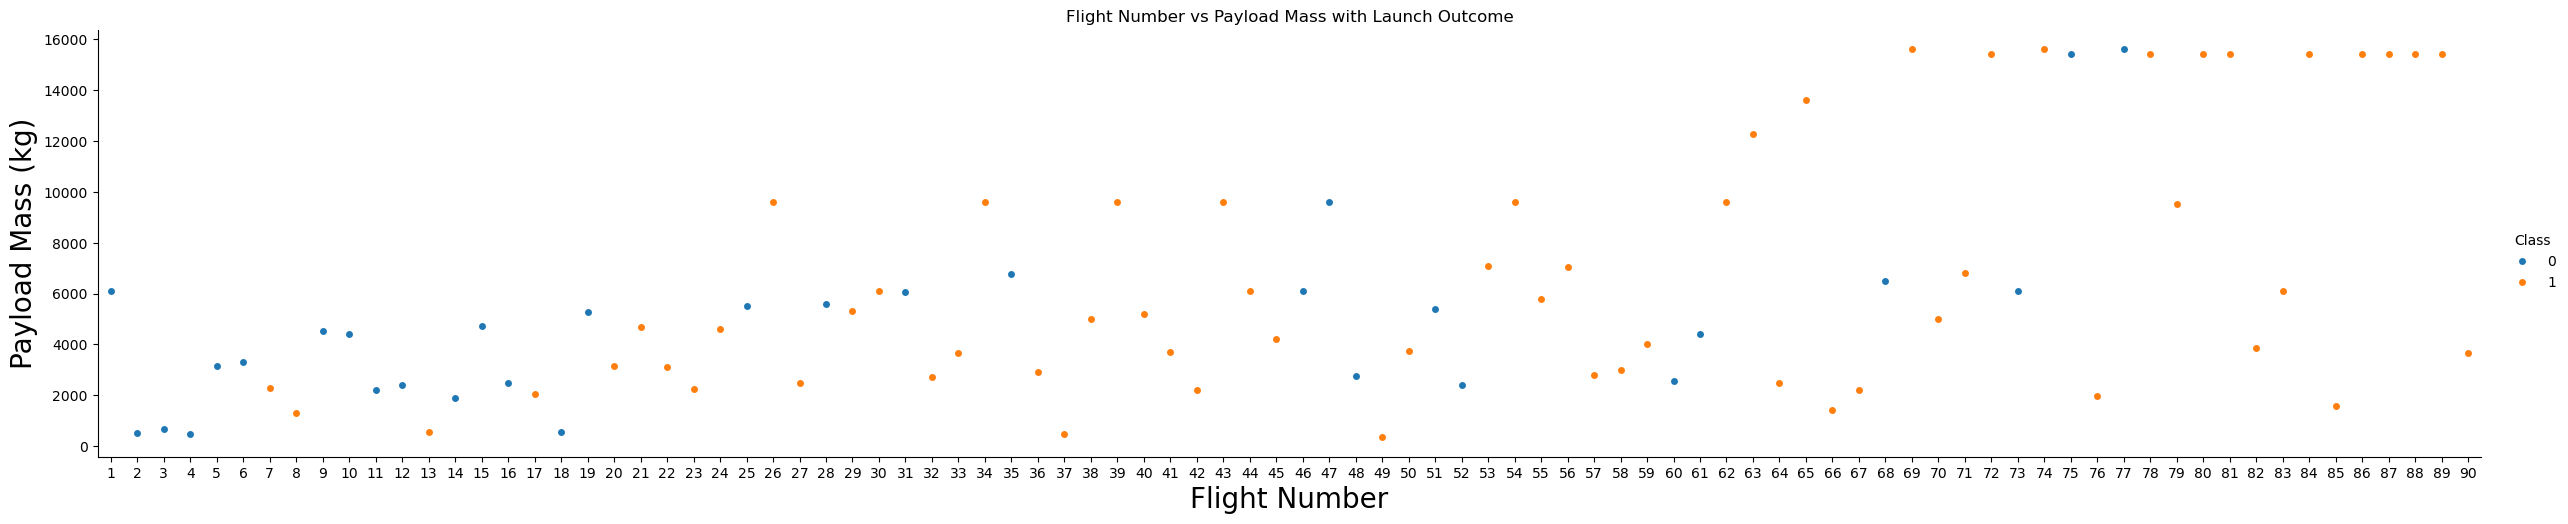

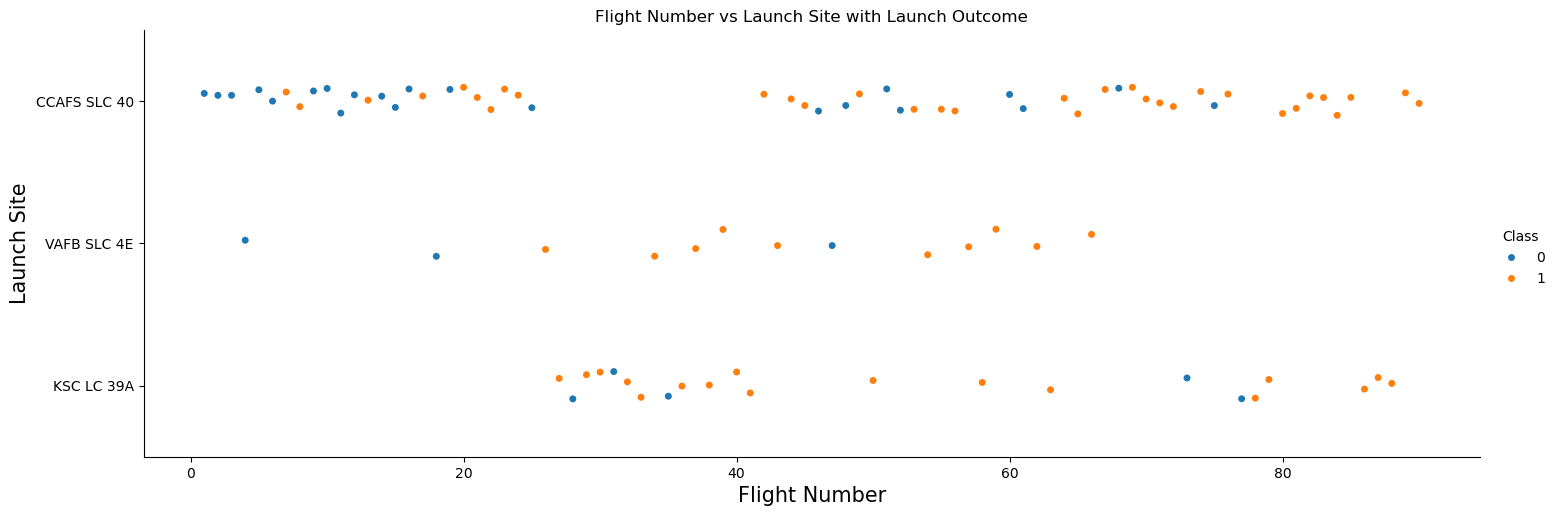

Observations:
- As the flight number increases, the first stage is more likely to land successfully.
- Even with heavier payloads, the first stage often returns successfully.
- Some launch sites consistently perform better than others.


In [ ]:
# EDA with Visualization task 1
# Install libraries (run in terminal if not installed)
# pip install numpy pandas seaborn matplotlib

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
print("First 5 records of the dataset:")
display(df.head(5))

# EDA: Flight Number vs Payload Mass
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Flight Number vs Payload Mass with Launch Outcome")
plt.show()

# Flight Number vs Launch Site
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=3)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site with Launch Outcome")
plt.show()

# Observations
print("Observations:")
print("- As the flight number increases, the first stage is more likely to land successfully.")
print("- Even with heavier payloads, the first stage often returns successfully.")
print("- Some launch sites consistently perform better than others.")


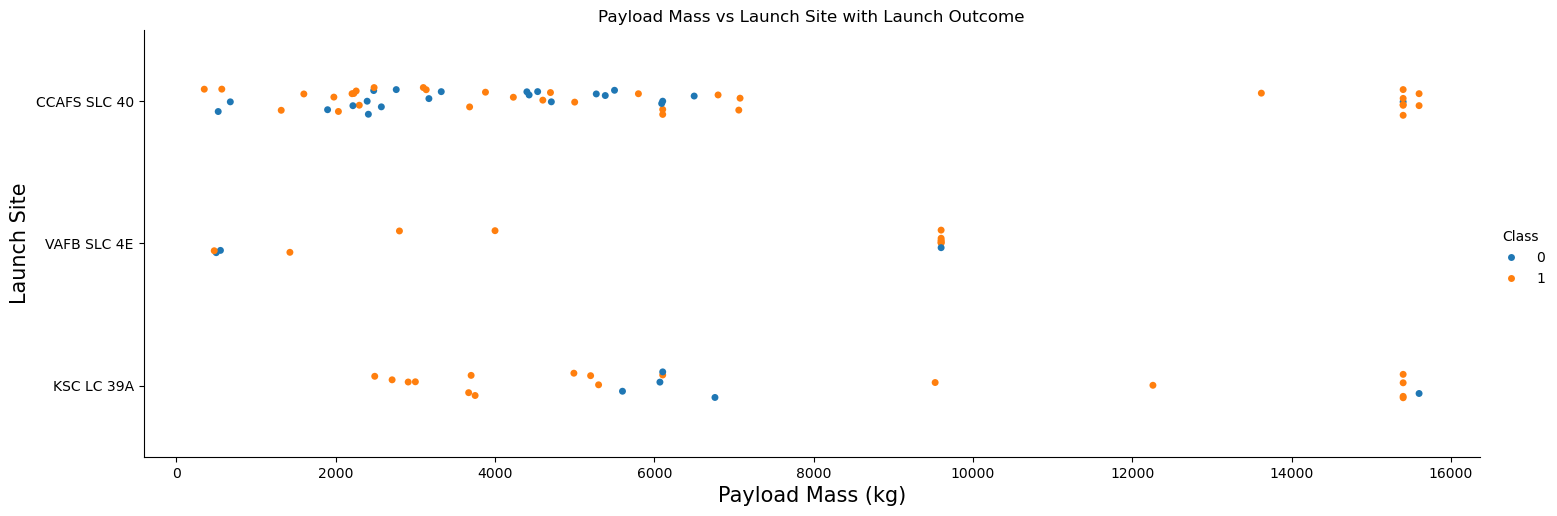

Observations:
- For the VAFB SLC-4E launch site, there are no rockets launched with heavy payloads (> 10000 kg).
- Different launch sites tend to carry different ranges of payload masses.
- Some launch sites consistently handle heavier payloads compared to others.


In [2]:

# Task 2: Payload Mass vs Launch Site

# Scatter plot: Payload Mass vs Launch Site, colored by launch outcome class
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site with Launch Outcome")
plt.show()

# Observations
print("Observations:")
print("- For the VAFB SLC-4E launch site, there are no rockets launched with heavy payloads (> 10000 kg).")
print("- Different launch sites tend to carry different ranges of payload masses.")
print("- Some launch sites consistently handle heavier payloads compared to others.")


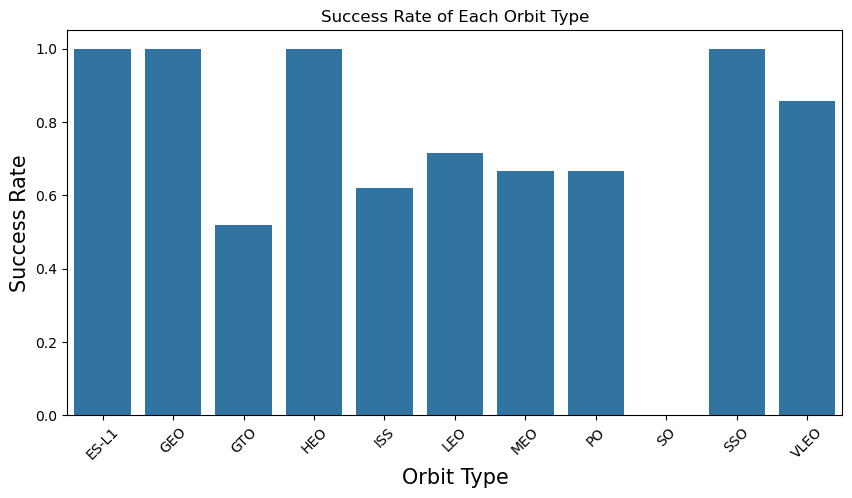

Observations:
- Orbits like ISS and LEO tend to have high success rates.
- Some orbits may have lower success rates, indicating more challenging missions.


In [3]:
# Task 3: Success Rate vs Orbit Type

# Group by Orbit and calculate mean of Class (success rate)
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Bar plot of success rate by Orbit
plt.figure(figsize=(10,5))
sns.barplot(x="Orbit", y="Class", data=orbit_success)
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate of Each Orbit Type")
plt.xticks(rotation=45)
plt.show()

# Observations
print("Observations:")
print("- Orbits like ISS and LEO tend to have high success rates.")
print("- Some orbits may have lower success rates, indicating more challenging missions.")


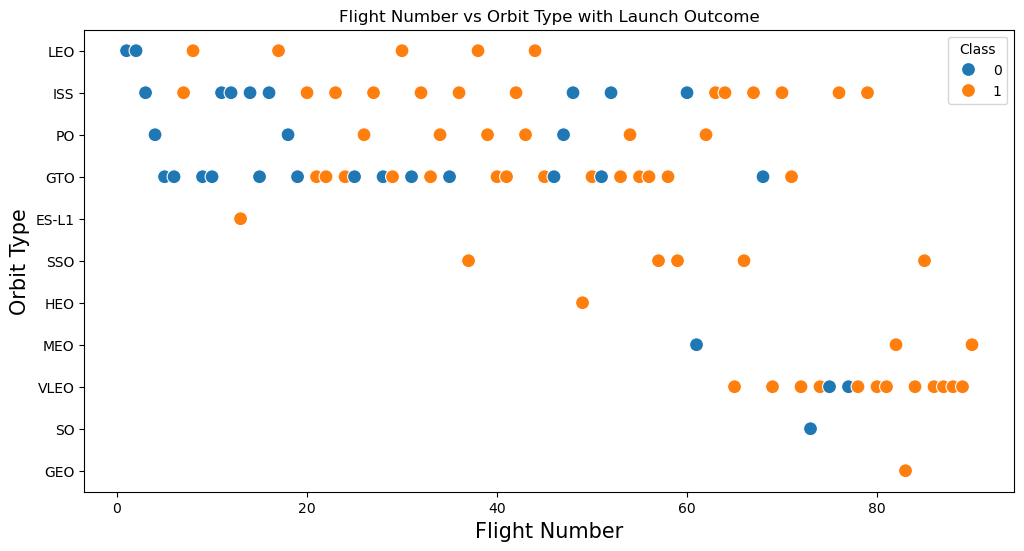

Observation for Task 4:
- In LEO orbits, success seems to improve with higher flight numbers.
- In GTO orbits, flight number does not seem to strongly affect success.


In [4]:
# Task 4: Flight Number vs Orbit Type

plt.figure(figsize=(12,6))
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, s=100)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type with Launch Outcome")
plt.show()

print("Observation for Task 4:")
print("- In LEO orbits, success seems to improve with higher flight numbers.")
print("- In GTO orbits, flight number does not seem to strongly affect success.")

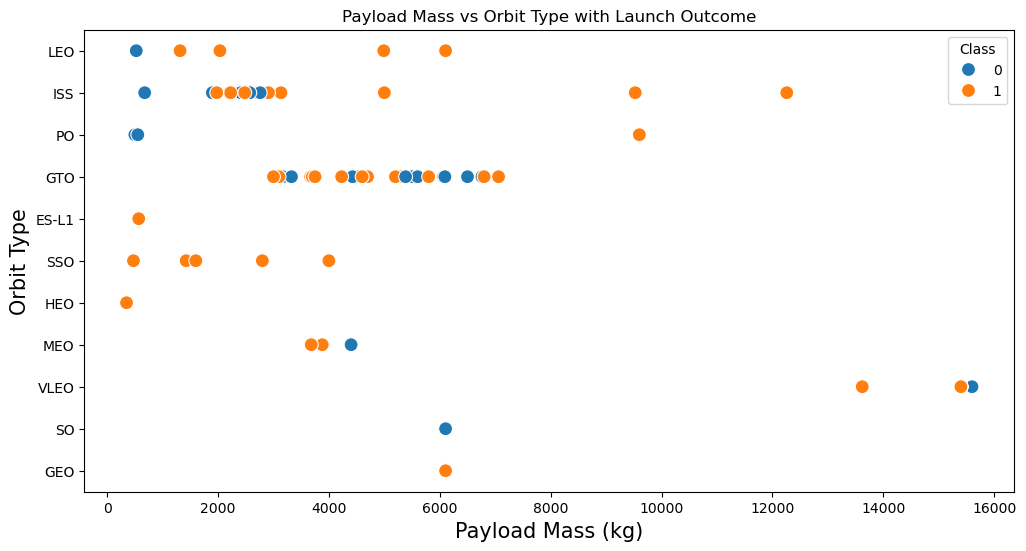

Observation for Task 5:
- Heavy payloads in Polar, LEO, and ISS orbits have higher success rates.
- In GTO orbit, success and failure occur across a range of payloads, so it's less predictable.


In [5]:
# Task 5: Payload Mass vs Orbit Type

plt.figure(figsize=(12,6))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, s=100)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type with Launch Outcome")
plt.show()

print("Observation for Task 5:")
print("- Heavy payloads in Polar, LEO, and ISS orbits have higher success rates.")
print("- In GTO orbit, success and failure occur across a range of payloads, so it's less predictable.")

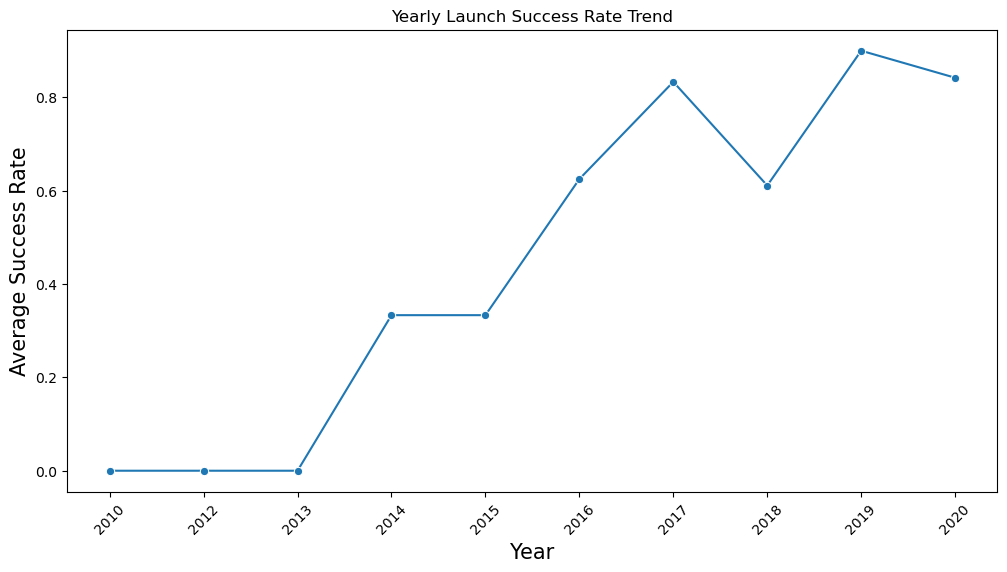

Observation for Task 6:
- The success rate has generally increased from 2013 to 2020.


In [6]:
# Task 6: Launch Success Yearly Trend

# Extract year from the Date column
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

# Group by year and calculate the average success rate
success_rate_yearly = df.groupby('Year')['Class'].mean().reset_index()

# Plot a line chart
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Class', data=success_rate_yearly, marker='o')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.title("Yearly Launch Success Rate Trend")
plt.xticks(rotation=45)
plt.show()

print("Observation for Task 6:")
print("- The success rate has generally increased from 2013 to 2020.")


In [7]:
# Feature Selection
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]
display(features.head())

# Task 7: Create Dummy Variables
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_cols)
display(features_one_hot.head())

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Task 8: Cast All Numeric Columns to float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("Dataset exported to 'dataset_part_3.csv'")

Dataset exported to 'dataset_part_3.csv'
